In [6]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# MPC import
import numpy as np
from LinearMPC.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

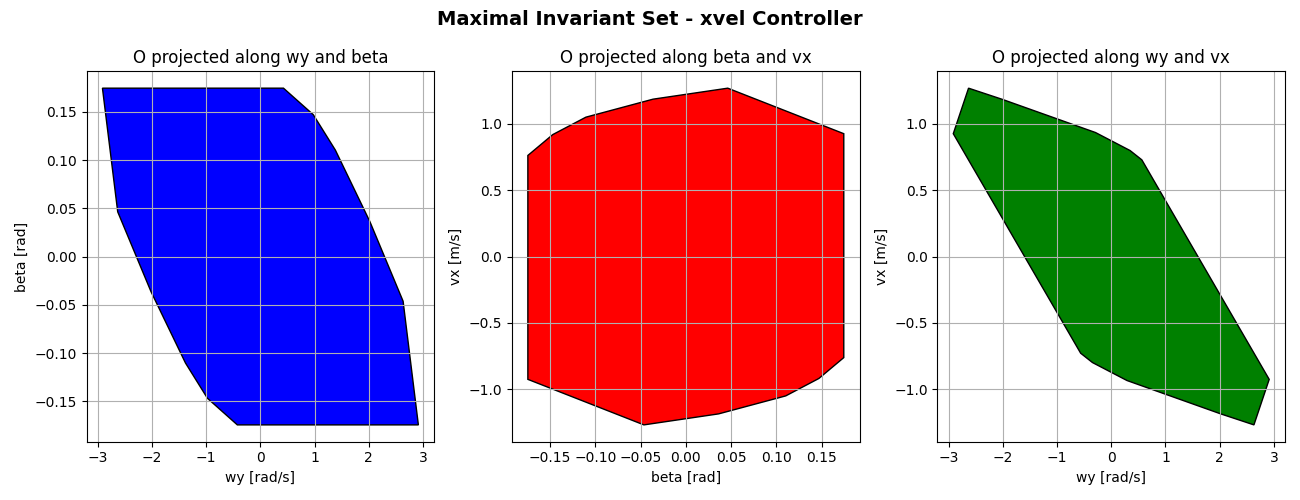

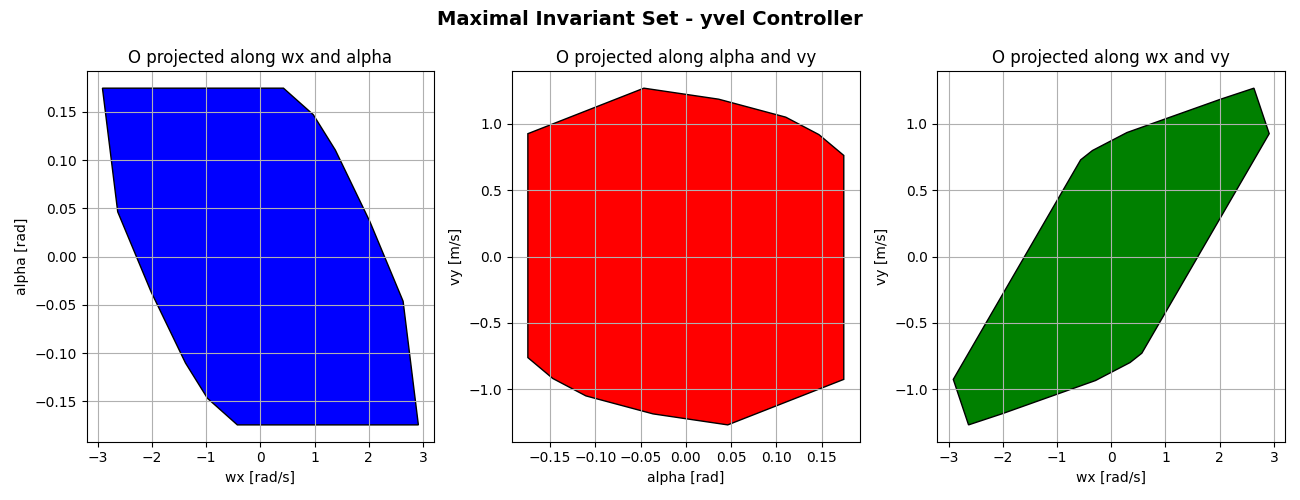

c:\Users\loeff\miniconda3\envs\mpc2025\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


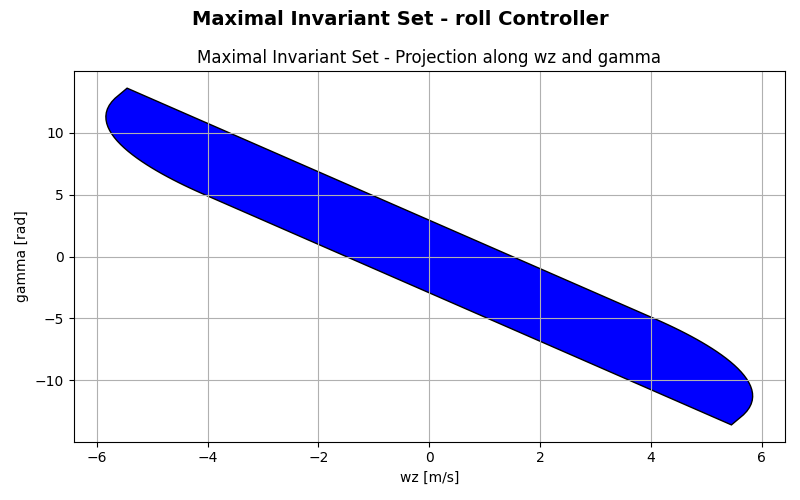

c:\Users\loeff\miniconda3\envs\mpc2025\Lib\site-packages\cvxpy\reductions\solvers\solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=99, step=2), IntSlider(value=0,…

In [8]:
Ts = 0.05
sim_time = 5
H = 5
x0 = np.array([0, 0, 0, 0, 0, 0.52, 5, 5, 5, 0, 0, 0])  # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);

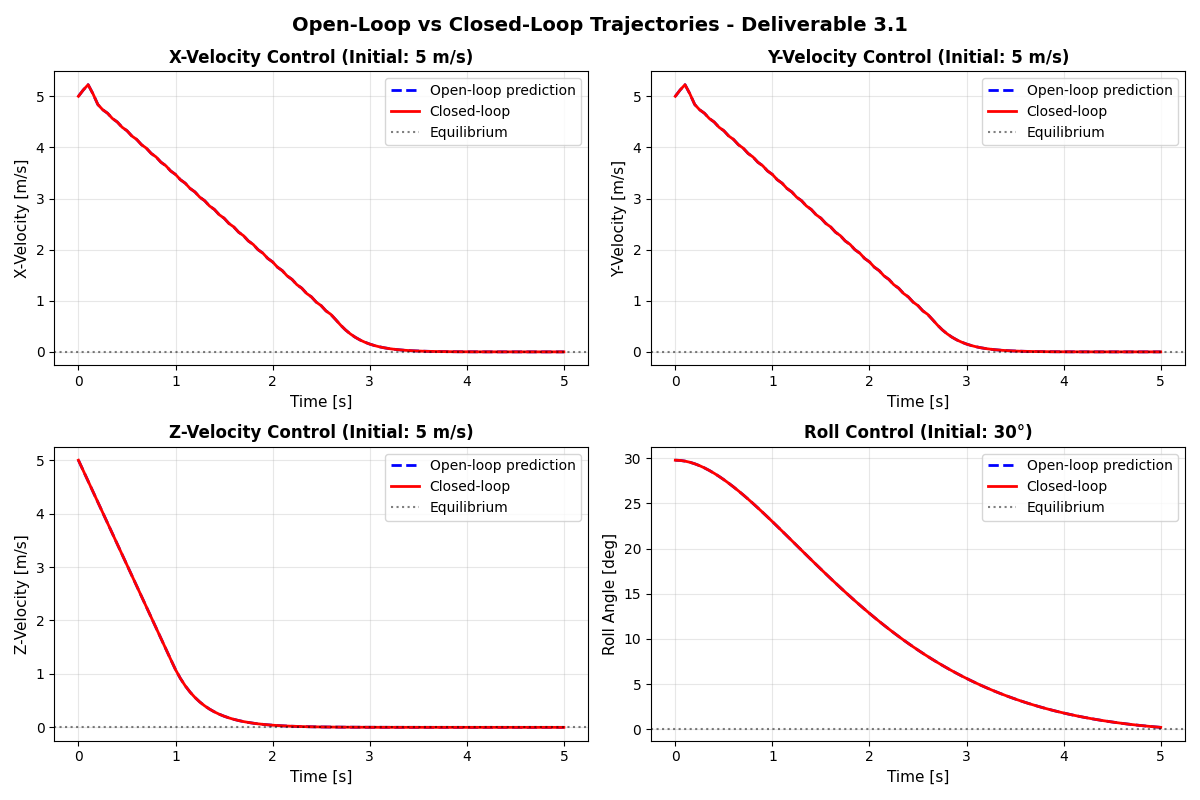

In [14]:
import matplotlib.pyplot as plt

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Open-Loop vs Closed-Loop Trajectories - Deliverable 3.1', fontsize=14, fontweight='bold')

# Initial conditions
x0_velocities = np.array([0, 0, 0, 0, 0, 0, 5, 5, 5, 0, 0, 0])  # 5 m/s for x, y, z
x0_roll = np.array([0, 0, 0, 0, 0, 0.52, 0, 0, 0, 0, 0, 0])  # 30° roll (0.52 rad)


# ==================== X-Velocity ====================
ax = axes[0, 0]
# Open-loop
t0 = 0
u_ol, x_ol, u_traj_ol, t_ol = mpc.get_u(t0, x0_velocities)
# Closed-loop
t_cl, x_cl, u_cl, _, _, _, _ = rocket.simulate_control(mpc, sim_time, H, x0_velocities, method='linear')

ax.plot(t_ol, x_ol[6, :], 'b--', linewidth=2, label='Open-loop prediction')
ax.plot(t_cl, x_cl[6, :], 'r-', linewidth=2, label='Closed-loop')
ax.axhline(y=0, color='k', linestyle=':', alpha=0.5, label='Equilibrium')
ax.set_xlabel('Time [s]', fontsize=11)
ax.set_ylabel('X-Velocity [m/s]', fontsize=11)
ax.set_title('X-Velocity Control (Initial: 5 m/s)', fontsize=12, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

# ==================== Y-Velocity ====================
ax = axes[0, 1]
# Open-loop
u_ol, x_ol, u_traj_ol, t_ol = mpc.get_u(t0, x0_velocities)
# Closed-loop
t_cl, x_cl, u_cl, _, _, _, _ = rocket.simulate_control(mpc, sim_time, H, x0_velocities, method='linear')

ax.plot(t_ol, x_ol[7, :], 'b--', linewidth=2, label='Open-loop prediction')
ax.plot(t_cl, x_cl[7, :], 'r-', linewidth=2, label='Closed-loop')
ax.axhline(y=0, color='k', linestyle=':', alpha=0.5, label='Equilibrium')
ax.set_xlabel('Time [s]', fontsize=11)
ax.set_ylabel('Y-Velocity [m/s]', fontsize=11)
ax.set_title('Y-Velocity Control (Initial: 5 m/s)', fontsize=12, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

# ==================== Z-Velocity ====================
ax = axes[1, 0]
# Open-loop
u_ol, x_ol, u_traj_ol, t_ol = mpc.get_u(t0, x0_velocities)
# Closed-loop
t_cl, x_cl, u_cl, _, _, _, _ = rocket.simulate_control(mpc, sim_time, H, x0_velocities, method='linear')

ax.plot(t_ol, x_ol[8, :], 'b--', linewidth=2, label='Open-loop prediction')
ax.plot(t_cl, x_cl[8, :], 'r-', linewidth=2, label='Closed-loop')
ax.axhline(y=0, color='k', linestyle=':', alpha=0.5, label='Equilibrium')
ax.set_xlabel('Time [s]', fontsize=11)
ax.set_ylabel('Z-Velocity [m/s]', fontsize=11)
ax.set_title('Z-Velocity Control (Initial: 5 m/s)', fontsize=12, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

# ==================== Roll Angle ====================
ax = axes[1, 1]
# Open-loop
u_ol, x_ol, u_traj_ol, t_ol = mpc.get_u(t0, x0_roll)
# Closed-loop
t_cl, x_cl, u_cl, _, _, _, _ = rocket.simulate_control(mpc, sim_time, H, x0_roll, method='linear')

# Convert from radians to degrees for better readability
ax.plot(t_ol, np.rad2deg(x_ol[5, :]), 'b--', linewidth=2, label='Open-loop prediction')
ax.plot(t_cl, np.rad2deg(x_cl[5, :]), 'r-', linewidth=2, label='Closed-loop')
ax.axhline(y=0, color='k', linestyle=':', alpha=0.5, label='Equilibrium')
ax.set_xlabel('Time [s]', fontsize=11)
ax.set_ylabel('Roll Angle [deg]', fontsize=11)
ax.set_title('Roll Control (Initial: 30°)', fontsize=12, fontweight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()